In [3]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 38.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [85]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import spacy
from collections import Counter
from transformers import pipeline

In [86]:
# Cargar modelo de SpaCy en español
nlp = spacy.load("es_core_news_sm")



In [87]:
# Cargar analizador de sentimientos más adecuado para español
sentiment_analyzer = pipeline("text-classification", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")

Device set to use cpu


In [7]:
def analizar_sentimiento(texto):
    resultado = sentiment_analyzer(texto)[0]['label']
    # Convertimos etiquetas en valores numéricos:
    if resultado == "positive":
        return 1
    elif resultado == "neutral":
        return 0
    else:  # "negative"
        return -1

In [88]:
# 1. CREACIÓN DE LA RED SOCIAL
import networkx as nx  # Make sure networkx is imported

num_nodos = 70
porcentaje_milei = 0.55  # 60% Milei
nodos_milei = int(num_nodos * porcentaje_milei)
nodos_massa = num_nodos - nodos_milei

# Listas de mensajes con distinta carga emocional
mensajes_milei = [
    "Apoyamos las reformas y el cambio!",
    "Basta de corrupción, queremos libertad!",
    "Argentina necesita un giro hacia el futuro.",
    "Es momento de dejar el pasado atrás y avanzar.",
    "Qué viva la libertad Carajo."
    "Fuera Kishner."
    "No más forros"
    "Queremos una argentina libre"
    "Viva la dolarización"
    "Adios a la casta"
    "Fuera casta corrupta"
    "Fuera dictadura Kirschner"
]

mensajes_massa = [
    "Defendamos la justicia social y la equidad!",
    "El progreso debe ser para todos, no solo para unos pocos.",
    "Construyamos juntos un país con oportunidades.",
    "Equidad y desarrollo son el camino al futuro.",
    "Debemos pensar en el bienestar colectivo."
    "No vamos a permitir que un payaso sea presidente"
    "Milei nos va a cortar con su motosierra"
    "Milei es un cagón con los jubilados"
    "Viva Massa"
    "Vos sos la casta, Milei"
    "La dolarización es una mentira"
]

# Crear el grafo G
G = nx.Graph() # Create an instance of the graph

# Crear nodos con mensajes variados
usuarios = {}
for i in range(num_nodos):
    if i < nodos_milei:
        mensaje = random.choice(mensajes_milei)
        grupo = "Milei"
    else:
        mensaje = random.choice(mensajes_massa)
        grupo = "Massa"

    usuarios[i] = {"grupo": grupo, "mensaje": mensaje}
    G.add_node(i, grupo=grupo, mensaje=mensaje)


In [89]:
import pandas as pd

# Create a DataFrame from the 'usuarios' dictionary
usuarios_df = pd.DataFrame.from_dict(usuarios, orient='index')

# Display the DataFrame
print(usuarios_df)

    grupo                                            mensaje
0   Milei        Argentina necesita un giro hacia el futuro.
1   Milei        Argentina necesita un giro hacia el futuro.
2   Milei  Qué viva la libertad Carajo.Fuera Kishner.No m...
3   Milei                 Apoyamos las reformas y el cambio!
4   Milei  Qué viva la libertad Carajo.Fuera Kishner.No m...
..    ...                                                ...
65  Massa  El progreso debe ser para todos, no solo para ...
66  Massa  El progreso debe ser para todos, no solo para ...
67  Massa  El progreso debe ser para todos, no solo para ...
68  Massa      Equidad y desarrollo son el camino al futuro.
69  Massa  Debemos pensar en el bienestar colectivo.No va...

[70 rows x 2 columns]


In [90]:
# 2. GENERACIÓN DE INTERACCIONES ENTRE NODOS
for i in range(num_nodos):
    num_interacciones = random.randint(1, 5)  # Cada usuario menciona de 1 a 5 nodos
    for _ in range(num_interacciones):
        mencionado = random.choice(list(usuarios.keys()))
        if mencionado != i:
            G.add_edge(i, mencionado)


In [57]:
# 3. ANÁLISIS EXPLORATORIO
print("Cantidad de usuarios por grupo:")
print(pd.Series([G.nodes[n]["grupo"] for n in G.nodes()]).value_counts())

Cantidad de usuarios por grupo:
Milei    38
Massa    32
Name: count, dtype: int64


In [58]:
# Tokenización y conteo de palabras
palabras = []
for nodo in G.nodes():
    doc = nlp(G.nodes[nodo]["mensaje"])
    palabras.extend([token.text.lower() for token in doc if not token.is_stop and not token.is_punct])

conteo_palabras = Counter(palabras)
print("\nPalabras más comunes en los mensajes:")
print(conteo_palabras.most_common(10))


Palabras más comunes en los mensajes:
[('casta', 18), ('argentina', 14), ('libertad', 14), ('momento', 11), ('dejar', 11), ('atrás', 11), ('avanzar', 11), ('equidad', 11), ('viva', 9), ('carajo', 9)]


In [59]:
# 4. ANÁLISIS DE MÉTRICAS DE RED
degree = dict(G.degree())  # Grado
betweenness = nx.betweenness_centrality(G)  # Intermediación
closeness = nx.closeness_centrality(G)  # Cercanía

# Convertir métricas a DataFrame
metricas_df = pd.DataFrame({
    "Nodo": list(G.nodes()),
    "Grupo": [G.nodes[n]["grupo"] for n in G.nodes()],
    "Grado": [degree[n] for n in G.nodes()],
    "Intermediación": [betweenness[n] for n in G.nodes()],
    "Cercanía": [closeness[n] for n in G.nodes()]
})
print(metricas_df.head(20))

    Nodo  Grupo  Grado  Intermediación  Cercanía
0      0  Milei      6        0.027819  0.413174
1      1  Milei      6        0.028616  0.410714
2      2  Milei      7        0.029428  0.396552
3      3  Milei      6        0.023470  0.375000
4      4  Milei      5        0.016465  0.389831
5      5  Milei      5        0.011607  0.372973
6      6  Milei      7        0.035146  0.425926
7      7  Milei      2        0.002870  0.331731
8      8  Milei      7        0.034993  0.418182
9      9  Milei      7        0.034354  0.392045
10    10  Milei      5        0.015047  0.353846
11    11  Milei      6        0.015273  0.383333
12    12  Milei      4        0.015995  0.361257
13    13  Milei      5        0.022136  0.383333
14    14  Milei      4        0.011491  0.355670
15    15  Milei      2        0.001174  0.315068
16    16  Milei      6        0.026445  0.403509
17    17  Milei      5        0.014019  0.381215
18    18  Milei      5        0.022718  0.383333
19    19  Milei     

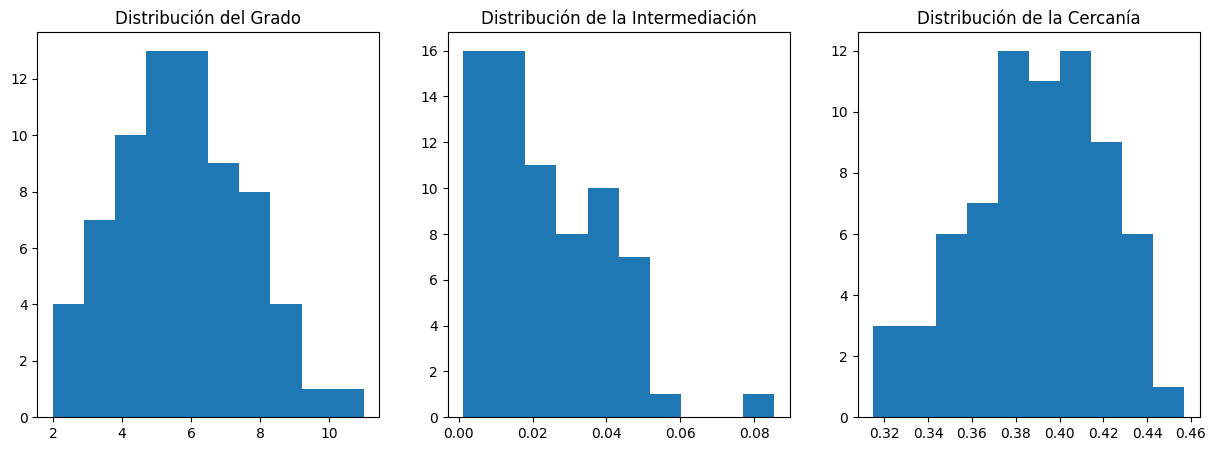

In [60]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(metricas_df["Grado"], bins=10)
axes[0].set_title("Distribución del Grado")

axes[1].hist(metricas_df["Intermediación"], bins=10)
axes[1].set_title("Distribución de la Intermediación")

axes[2].hist(metricas_df["Cercanía"], bins=10)
axes[2].set_title("Distribución de la Cercanía")

plt.show()

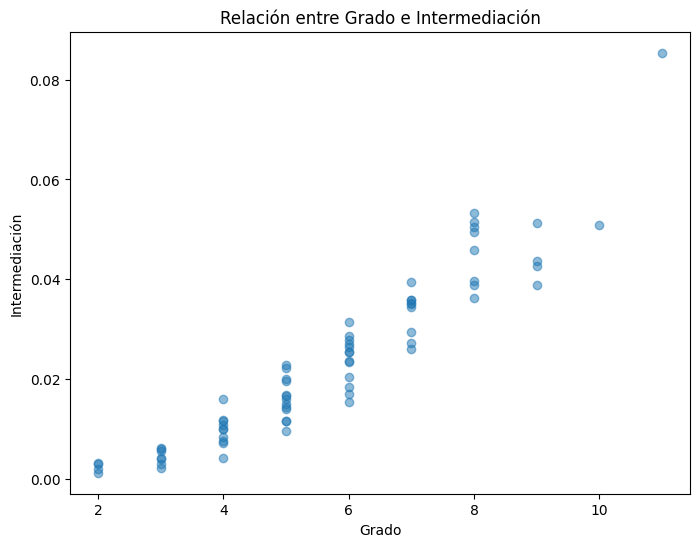

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(metricas_df["Grado"], metricas_df["Intermediación"], alpha=0.5)
plt.title("Relación entre Grado e Intermediación")
plt.xlabel("Grado")
plt.ylabel("Intermediación")
plt.show()

In [62]:
# 5. ANÁLISIS DE SENTIMIENTOS
for nodo in G.nodes():
    mensaje = G.nodes[nodo]["mensaje"]
    score = analizar_sentimiento(mensaje)  # Polaridad del mensaje
    G.nodes[nodo]["sentimiento"] = score
    metricas_df.loc[metricas_df["Nodo"] == nodo, "Sentimiento"] = score

# Add the 'mensaje' column to metricas_df
metricas_df['mensaje'] = [G.nodes[n]["mensaje"] for n in G.nodes()]

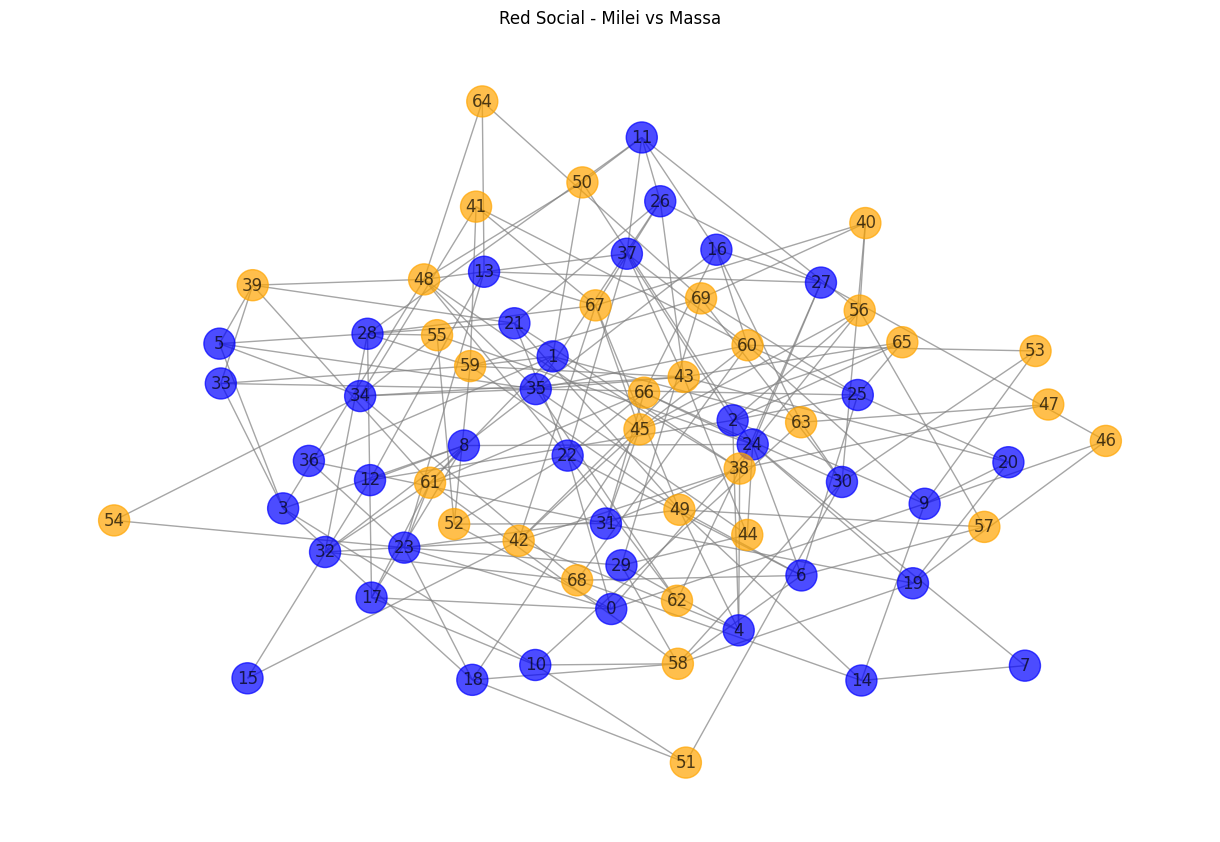

In [73]:
# 6. VISUALIZACIÓN DE LA RED
plt.figure(figsize=(12, 8))

# Colores según grupo
color_map = ["blue" if G.nodes[n]["grupo"] == "Milei" else "orange" for n in G.nodes()]

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color="gray", node_size=500, alpha=0.7)
plt.title("Red Social - Milei vs Massa")
plt.show()

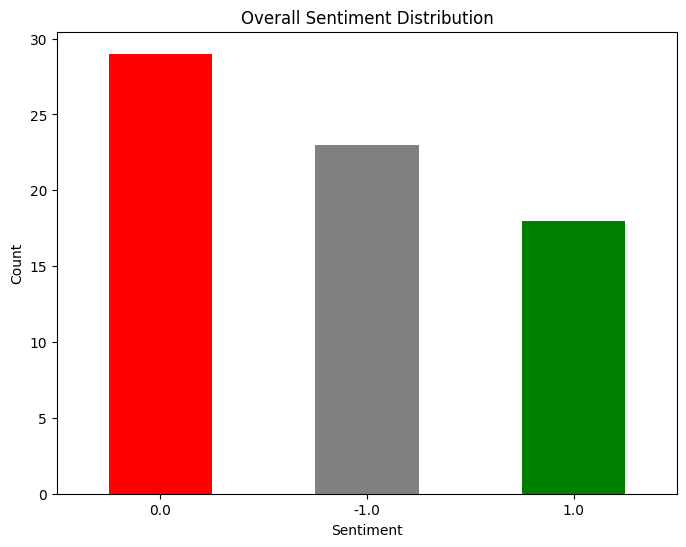

In [64]:
# 1. Graph for overall sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts = metricas_df['Sentimiento'].value_counts()
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])  # Assuming -1: red, 0: gray, 1: green
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

<Figure size 800x600 with 0 Axes>

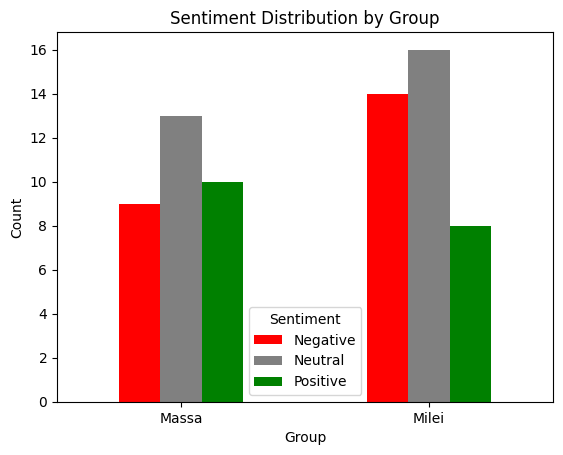

In [65]:
# 2. Graph for sentiment distribution by group
plt.figure(figsize=(8, 6))
sentiment_by_group = metricas_df.groupby(['Grupo', 'Sentimiento'])['Nodo'].count().reset_index()
sentiment_by_group.pivot(index='Grupo', columns='Sentimiento', values='Nodo').plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Sentiment Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.show()

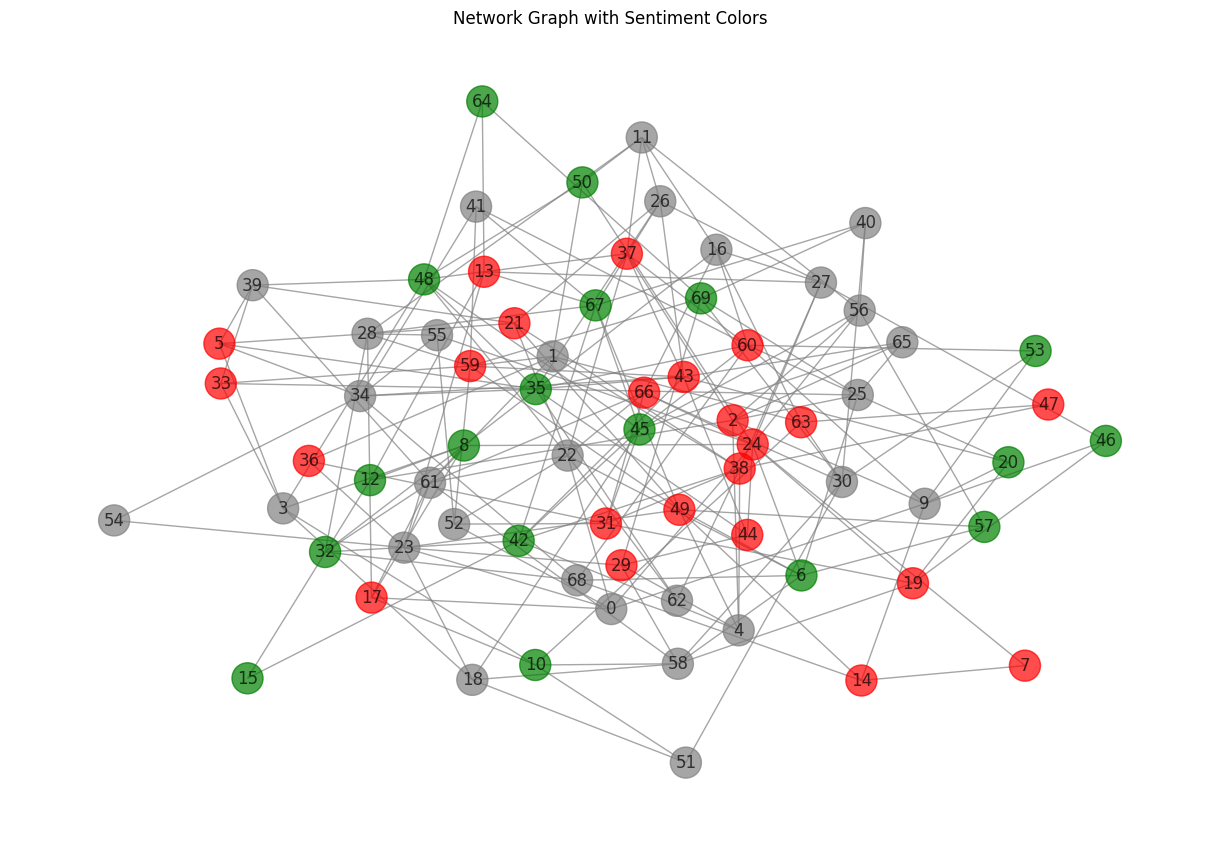

All Messages with Sentiment:


,Node,Group,Message,Sentiment
0,0,Milei,Es momento de dejar el pasado atrás y avanzar.,0.0
1,1,Milei,Argentina necesita un giro hacia el futuro.,0.0
2,2,Milei,Qué viva la libertad Carajo.Fuera Kishner.No m...,-1.0
3,3,Milei,Argentina necesita un giro hacia el futuro.,0.0
4,4,Milei,Es momento de dejar el pasado atrás y avanzar.,0.0
...,...,...,...,...
65,65,Massa,"El progreso debe ser para todos, no solo para ...",0.0
66,66,Massa,Debemos pensar en el bienestar colectivo.No va...,-1.0
67,67,Massa,Equidad y desarrollo son el camino al futuro.,1.0
68,68,Massa,Defendamos la justicia social y la equidad!,0.0



Negative Messages:


,Node,Group,Message,Sentiment
2,2,Milei,Qué viva la libertad Carajo.Fuera Kishner.No m...,-1.0
5,5,Milei,"Basta de corrupción, queremos libertad!",-1.0
7,7,Milei,Qué viva la libertad Carajo.Fuera Kishner.No m...,-1.0
13,13,Milei,"Basta de corrupción, queremos libertad!",-1.0
14,14,Milei,"Basta de corrupción, queremos libertad!",-1.0
17,17,Milei,Qué viva la libertad Carajo.Fuera Kishner.No m...,-1.0
19,19,Milei,Qué viva la libertad Carajo.Fuera Kishner.No m...,-1.0
21,21,Milei,"Basta de corrupción, queremos libertad!",-1.0
24,24,Milei,Qué viva la libertad Carajo.Fuera Kishner.No m...,-1.0
29,29,Milei,"Basta de corrupción, queremos libertad!",-1.0



Neutral Messages:


,Node,Group,Message,Sentiment
0,0,Milei,Es momento de dejar el pasado atrás y avanzar.,0.0
1,1,Milei,Argentina necesita un giro hacia el futuro.,0.0
3,3,Milei,Argentina necesita un giro hacia el futuro.,0.0
4,4,Milei,Es momento de dejar el pasado atrás y avanzar.,0.0
9,9,Milei,Es momento de dejar el pasado atrás y avanzar.,0.0
11,11,Milei,Es momento de dejar el pasado atrás y avanzar.,0.0
16,16,Milei,Es momento de dejar el pasado atrás y avanzar.,0.0
18,18,Milei,Es momento de dejar el pasado atrás y avanzar.,0.0
22,22,Milei,Es momento de dejar el pasado atrás y avanzar.,0.0
23,23,Milei,Es momento de dejar el pasado atrás y avanzar.,0.0



Positive Messages:


,Node,Group,Message,Sentiment
6,6,Milei,Apoyamos las reformas y el cambio!,1.0
8,8,Milei,Apoyamos las reformas y el cambio!,1.0
10,10,Milei,Apoyamos las reformas y el cambio!,1.0
12,12,Milei,Apoyamos las reformas y el cambio!,1.0
15,15,Milei,Apoyamos las reformas y el cambio!,1.0
20,20,Milei,Apoyamos las reformas y el cambio!,1.0
32,32,Milei,Apoyamos las reformas y el cambio!,1.0
35,35,Milei,Apoyamos las reformas y el cambio!,1.0
42,42,Massa,Construyamos juntos un país con oportunidades.,1.0
45,45,Massa,Construyamos juntos un país con oportunidades.,1.0


In [66]:
# 3. Network graph with node color representing sentiment
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Or use other layout like circular_layout, kamada_kawai_layout
sentiment_colors = {-1: 'red', 0: 'gray', 1: 'green'}
node_colors = [sentiment_colors[G.nodes[node]['sentimiento']] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=500, alpha=0.7)
plt.title('Network Graph with Sentiment Colors')
plt.show()

# Tables with messages and sentiment
# Table for all messages with sentiment
messages_df = metricas_df[['Nodo', 'Grupo', 'mensaje', 'Sentimiento']].copy()
messages_df.columns = ['Node', 'Group', 'Message', 'Sentiment']
print("All Messages with Sentiment:")
display(messages_df)  # Use 'display' for better formatting in Jupyter

# Tables for messages by sentiment category
for sentiment_value, sentiment_label in { -1: 'Negative', 0: 'Neutral', 1: 'Positive'}.items():
    sentiment_messages = messages_df[messages_df['Sentiment'] == sentiment_value]
    print(f"\n{sentiment_label} Messages:")
    display(sentiment_messages)

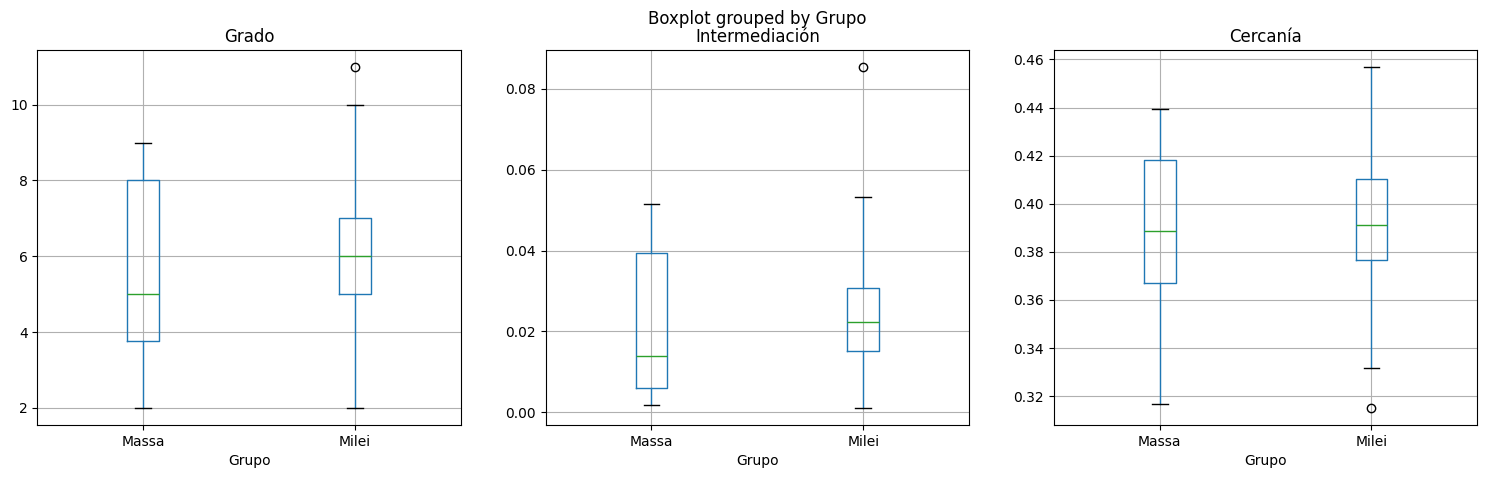

In [67]:
# 7. VISUALIZACIÓN DE MÉTRICAS
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
metricas_df.boxplot("Grado", by="Grupo", ax=ax[0])
metricas_df.boxplot("Intermediación", by="Grupo", ax=ax[1])
metricas_df.boxplot("Cercanía", by="Grupo", ax=ax[2])
plt.show()


In [68]:
metricas_df["Sentimiento"] = pd.to_numeric(metricas_df["Sentimiento"], errors="coerce").fillna(0)


<Figure size 1000x500 with 0 Axes>

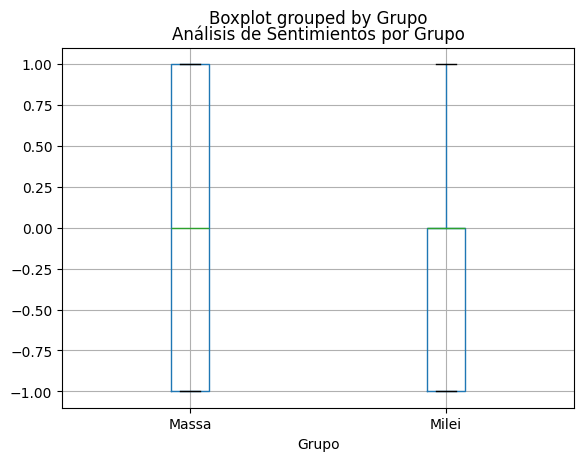

In [69]:
# 8. MOSTRAR ANÁLISIS DE SENTIMIENTOS
metricas_df["Sentimiento"] = pd.to_numeric(metricas_df["Sentimiento"], errors="coerce").fillna(0)  # Asegurar valores numéricos

plt.figure(figsize=(10, 5))
metricas_df.boxplot("Sentimiento", by="Grupo")
plt.title("Análisis de Sentimientos por Grupo")
plt.show()


In [77]:
# Calculate influence metrics (e.g., degree centrality, betweenness centrality)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Add influence metrics to the DataFrame
metricas_df['DegreeCentrality'] = metricas_df['Nodo'].map(degree_centrality)
metricas_df['BetweennessCentrality'] = metricas_df['Nodo'].map(betweenness_centrality)

# Identify influential nodes by sentiment
def get_influential_nodes_by_sentiment(df, sentiment, top_n=5):
    """
    Returns the top N most influential nodes for a given sentiment.
    """
    sentiment_df = df[df['Sentimiento'] == sentiment]
    # You can change the sorting column to other centrality measures if needed
    influential_nodes = sentiment_df.sort_values(by=['DegreeCentrality'], ascending=False).head(top_n)
    return influential_nodes

# Get influential nodes for each sentiment
negative_influential = get_influential_nodes_by_sentiment(metricas_df, -1)
neutral_influential = get_influential_nodes_by_sentiment(metricas_df, 0)
positive_influential = get_influential_nodes_by_sentiment(metricas_df, 1)

# Display the results
print("Most Influential Negative Nodes:")
display(negative_influential)

print("\nMost Influential Neutral Nodes:")
display(neutral_influential)

print("\nMost Influential Positive Nodes:")
display(positive_influential)

Most Influential Negative Nodes:


,Nodo,Grupo,Grado,Intermediación,Cercanía,Sentimiento,mensaje,DegreeCentrality,BetweennessCentrality
24,24,Milei,11,0.085408,0.456954,-1.0,Qué viva la libertad Carajo.Fuera Kishner.No m...,0.159420,0.085408
60,60,Massa,9,0.051279,0.433962,-1.0,Debemos pensar en el bienestar colectivo.No va...,0.130435,0.051279
43,43,Massa,9,0.042713,0.428571,-1.0,Debemos pensar en el bienestar colectivo.No va...,0.130435,0.042713
59,59,Massa,8,0.050362,0.439490,-1.0,Debemos pensar en el bienestar colectivo.No va...,0.115942,0.050362
49,49,Massa,8,0.045904,0.423313,-1.0,Debemos pensar en el bienestar colectivo.No va...,0.115942,0.045904



Most Influential Neutral Nodes:


,Nodo,Grupo,Grado,Intermediación,Cercanía,Sentimiento,mensaje,DegreeCentrality,BetweennessCentrality
61,61,Massa,9,0.043682,0.431250,0.0,Defendamos la justicia social y la equidad!,0.130435,0.043682
22,22,Milei,9,0.038891,0.431250,0.0,Es momento de dejar el pasado atrás y avanzar.,0.130435,0.038891
23,23,Milei,8,0.053259,0.418182,0.0,Es momento de dejar el pasado atrás y avanzar.,0.115942,0.053259
28,28,Milei,8,0.036205,0.418182,0.0,Es momento de dejar el pasado atrás y avanzar.,0.115942,0.036205
30,30,Milei,7,0.035754,0.385475,0.0,Argentina necesita un giro hacia el futuro.,0.101449,0.035754



Most Influential Positive Nodes:


,Nodo,Grupo,Grado,Intermediación,Cercanía,Sentimiento,mensaje,DegreeCentrality,BetweennessCentrality
35,35,Milei,10,0.050861,0.431250,1.0,Apoyamos las reformas y el cambio!,0.144928,0.050861
45,45,Massa,8,0.051533,0.439490,1.0,Construyamos juntos un país con oportunidades.,0.115942,0.051533
67,67,Massa,8,0.039587,0.423313,1.0,Equidad y desarrollo son el camino al futuro.,0.115942,0.039587
48,48,Massa,8,0.038822,0.418182,1.0,Construyamos juntos un país con oportunidades.,0.115942,0.038822
8,8,Milei,7,0.034993,0.418182,1.0,Apoyamos las reformas y el cambio!,0.101449,0.034993


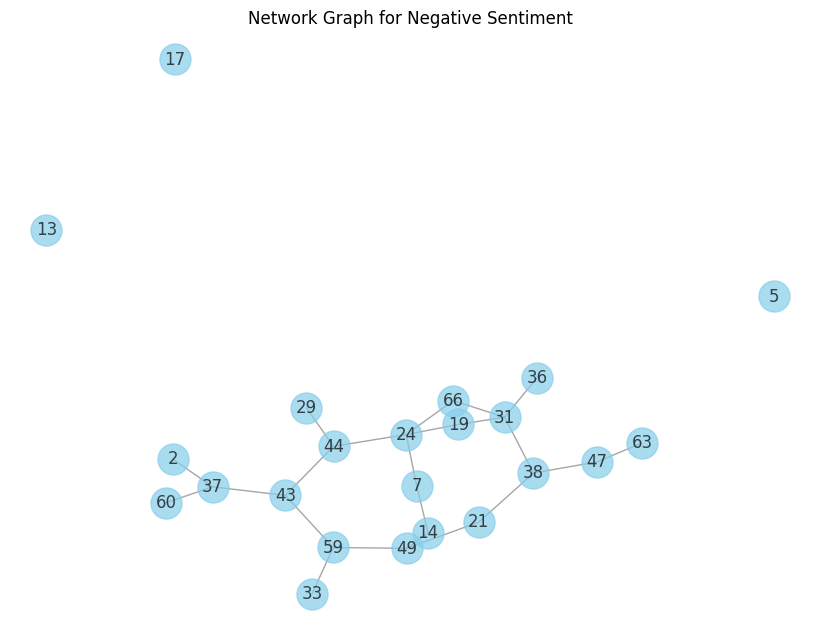

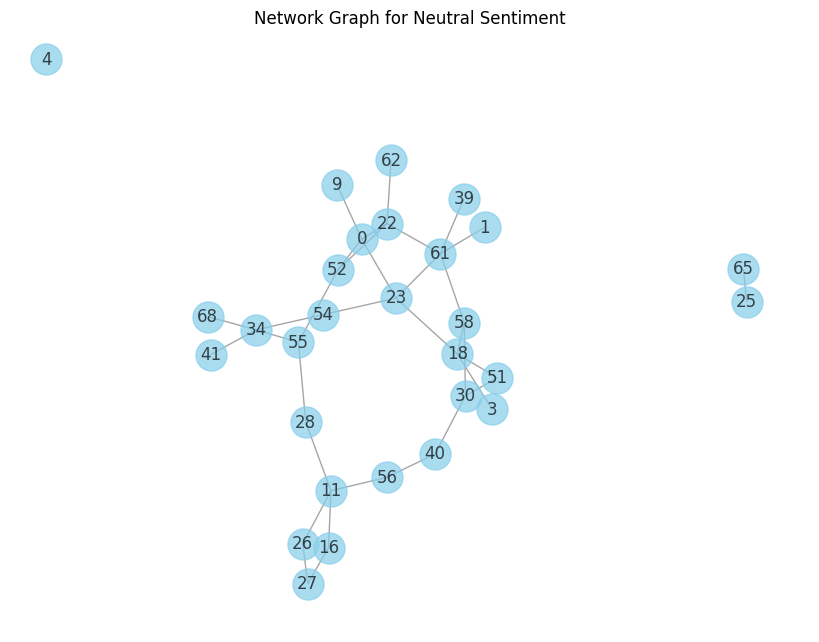

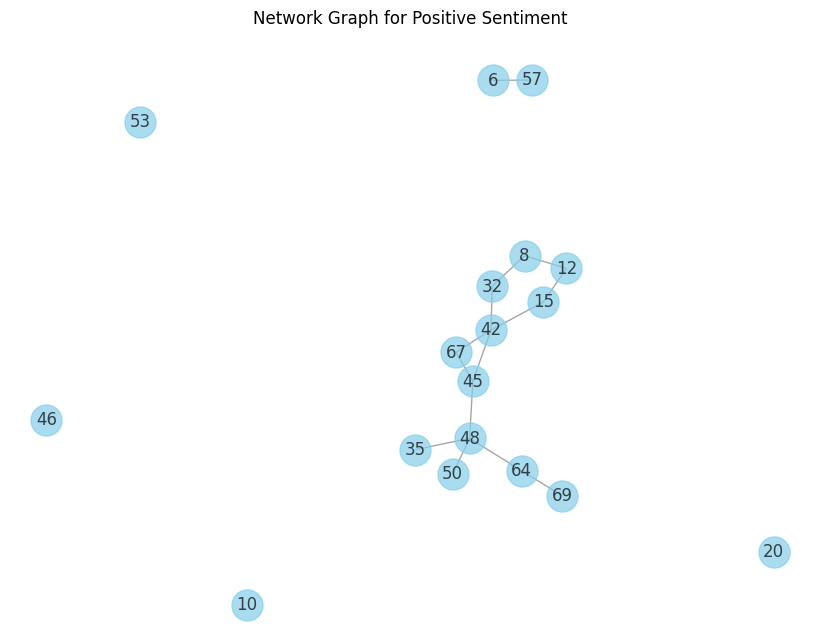

In [80]:
def plot_network_by_sentiment(G, sentiment, sentiment_label):
    """
    Plots a network graph showing relationships between nodes with a specific sentiment.
    """
    # Filter nodes based on sentiment
    nodes_with_sentiment = [node for node in G.nodes() if G.nodes[node]['sentimiento'] == sentiment]

    # Create a subgraph with only the filtered nodes and their edges
    subgraph = G.subgraph(nodes_with_sentiment)

    # Plot the subgraph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(subgraph, seed=42)  # You can use other layouts
    nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, alpha=0.7)
    plt.title(f'Network Graph for {sentiment_label} Sentiment')
    plt.show()

# Plot for each sentiment category
plot_network_by_sentiment(G, -1, 'Negative')
plot_network_by_sentiment(G, 0, 'Neutral')
plot_network_by_sentiment(G, 1, 'Positive')

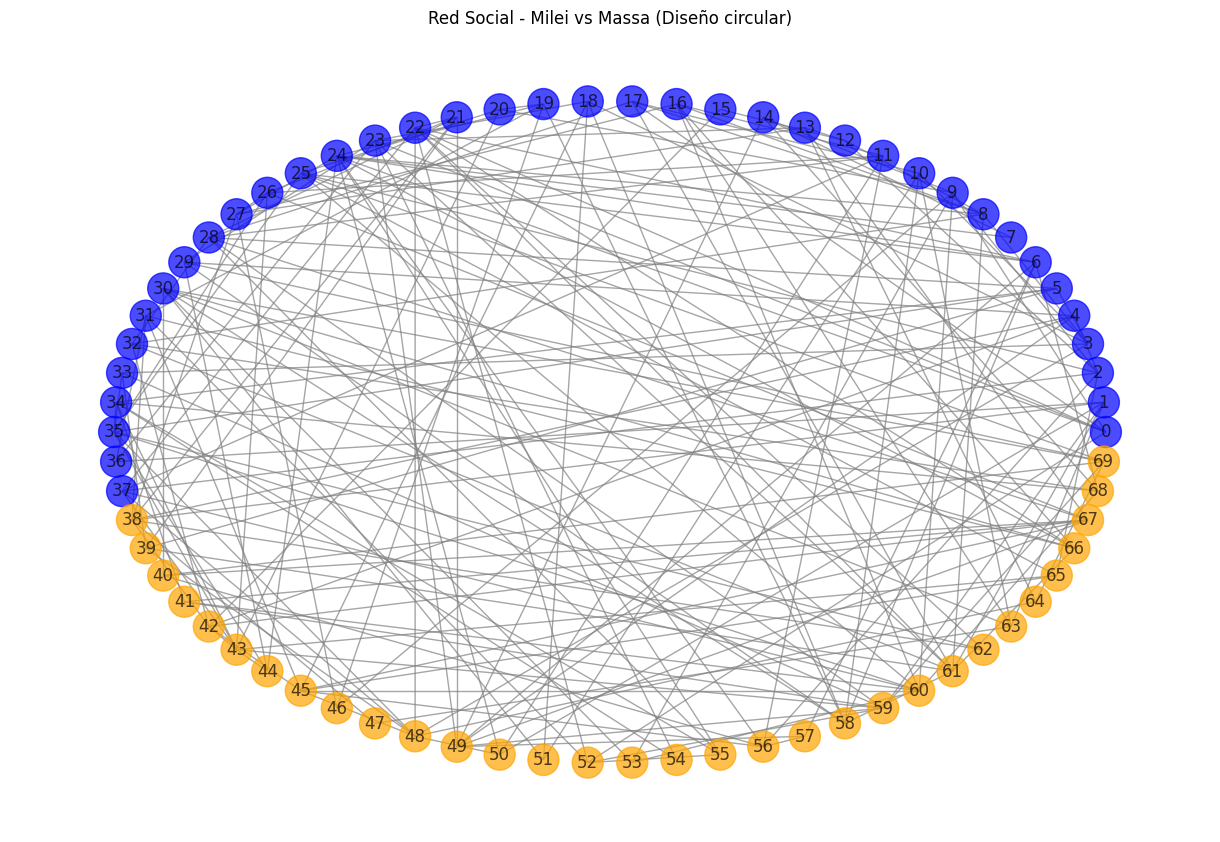

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Colores según grupo
color_map = ["blue" if G.nodes[n]["grupo"] == "Milei" else "orange" for n in G.nodes()]

pos = nx.circular_layout(G)  # Diseño circular
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color="gray", node_size=500, alpha=0.7)
plt.title("Red Social - Milei vs Massa (Diseño circular)")
plt.show()

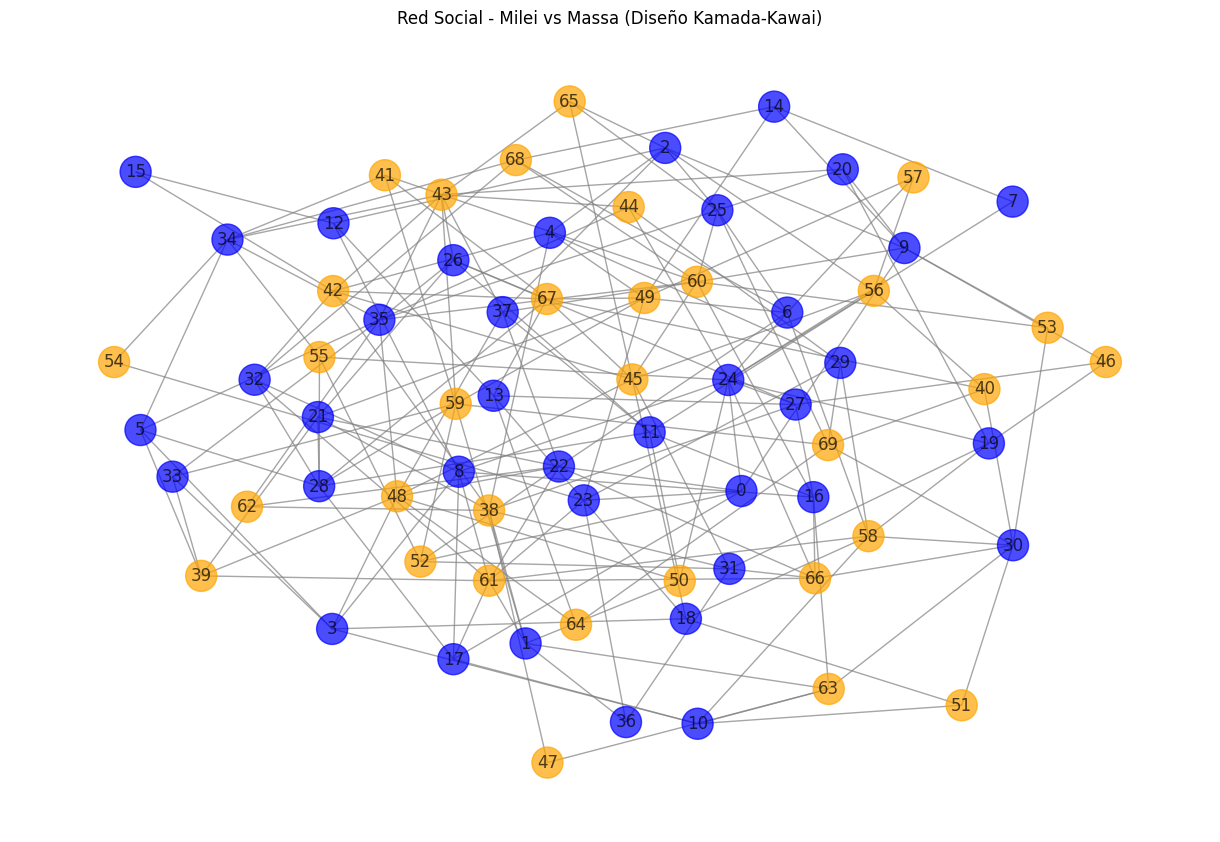

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Colores según grupo
color_map = ["blue" if G.nodes[n]["grupo"] == "Milei" else "orange" for n in G.nodes()]

pos = nx.kamada_kawai_layout(G)  # Diseño Kamada-Kawai
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color="gray", node_size=500, alpha=0.7)
plt.title("Red Social - Milei vs Massa (Diseño Kamada-Kawai)")
plt.show()

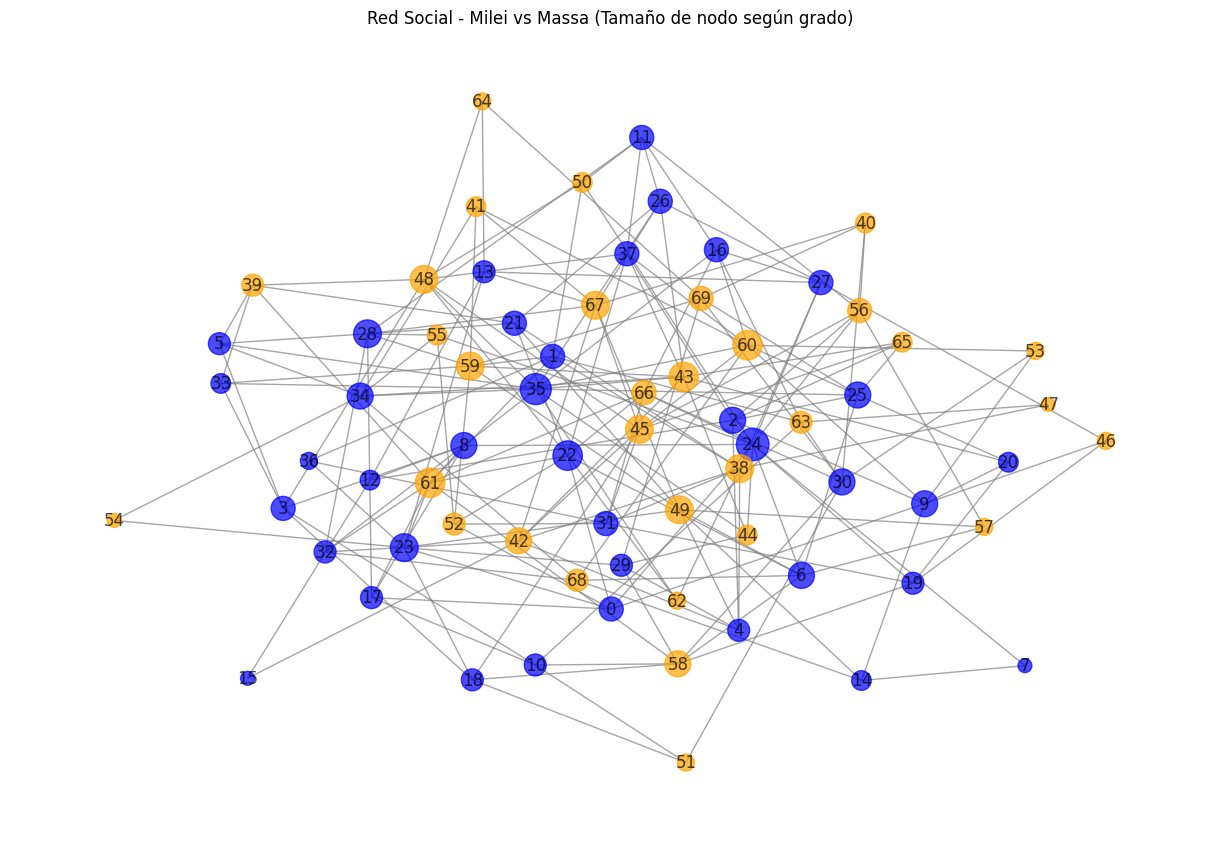

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Colores según grupo
color_map = ["blue" if G.nodes[n]["grupo"] == "Milei" else "orange" for n in G.nodes()]

# Tamaño de nodo según grado
node_sizes = [degree[n] * 50 for n in G.nodes()]  # Ajusta el factor 50 para el tamaño deseado

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color="gray", node_size=node_sizes, alpha=0.7)
plt.title("Red Social - Milei vs Massa (Tamaño de nodo según grado)")
plt.show()

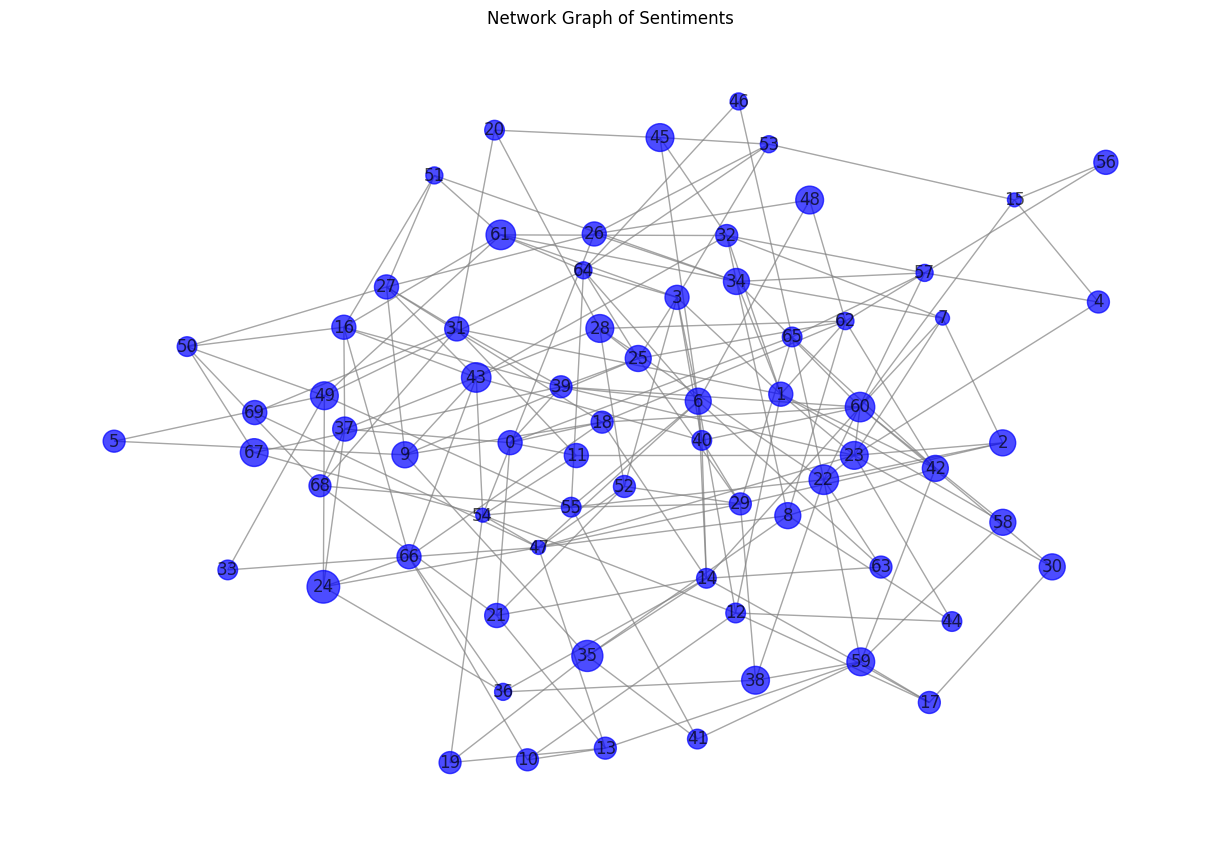

In [93]:
# 1. Define a color map for sentiments
sentiment_colors = {-1: 'red', 0: 'gray', 1: 'green'}

# 2. Get node colors based on sentiment, handling missing 'sentimiento' attribute
node_colors = [sentiment_colors.get(G.nodes[node].get('sentimiento'), 'blue') for node in G.nodes()] # If 'sentimiento' is missing, use 'blue'

# 3. Define node sizes based on a metric (e.g., degree centrality)
node_sizes = [degree[n] * 50 for n in G.nodes()]  # Adjust the factor for desired size

# 4. Choose a layout for the graph
pos = nx.spring_layout(G, seed=42)  # You can use other layouts like circular_layout

# 5. Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True,
        node_color=node_colors,  # Color nodes by sentiment
        edge_color="gray",
        node_size=node_sizes,  # Size nodes by degree
        alpha=0.7)

# 6. Add a title
plt.title("Network Graph of Sentiments")

# 7. Show the plot
plt.show()